MNIST Classification using Tensorflow with Keras API¶

In [1]:
#be sure to have installed tensorflow using conda (c.f. DL-PW-01.pdf , Exercise 1)
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load and prepare data

In [2]:
#tf.keras provides different datasets  
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets
mnist = tf.keras.datasets.mnist
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

#we merge data to have the same conditions as for numpy implementation
x = np.concatenate((x_train1, x_test1), axis=0)
y = np.concatenate((y_train1, y_test1), axis=0)

#tf.keras has method to create onehot representation
y = tf.keras.utils.to_categorical(y)

print(x.shape, y.shape)

(70000, 28, 28) (70000, 10)


In [3]:
#select training and test set (random_state sets the seed for reproducible results)

from sklearn import model_selection as ms

#define train and test split
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, 
                                     test_size=0.15, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(59500, 28, 28) (10500, 28, 28) (59500, 10) (10500, 10)


In [4]:
#perform normalisation

xmax, xmin = np.max(x_train), np.min(x_train)
x_train = 2*(x_train - xmin) / (xmax - xmin) - 1
x_test = 2*(x_test - xmin) / (xmax - xmin) - 1

### Model and Cost

In [33]:
#function to create a 'sequential' models with list of dense layers (just add additional ones in list below)
def define_model(learning_rate, hidden_neurons):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hidden_neurons[0], activation='sigmoid'),
        #tf.keras.layers.Dense(hidden_neurons[1], activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    print(model.summary())

    #choose the SGD optimiser with given learning rate -> c.f. week 6 for different optimisers
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    #Configures the model for training: set the optimiser and define loss function
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', #'mean_squared_error'
        metrics=['accuracy'])

    return model

Define output folder and start training

You have to start tensorboard on the command line (like jupyter notebook) using:

tensorboard --logdir="path to log_dir below"

(double quotations " " are used under windows, check for different conventions on other OS)


In [50]:
#clear everything
tf.keras.backend.clear_session()

#you may have to delete the model to start from scratch
#del model

#output is written to the folder with name defined below
name = 'mnist_one_hidden_layer'

tensorboard = TensorBoard(
        log_dir='./tensorboard/' + name + '/', 
        update_freq='epoch', write_graph=True,
        histogram_freq=1)

#define suitable parameters ...
learning_rate = 0.1
hidden_neurons = [150]

#and create model
model = define_model(learning_rate, hidden_neurons)

batchsize = 256
epochs = 50

#now start training (you can choose the train/validation set split)
history = model.fit(x_train, y_train, verbose = 0,
                        validation_split=0.2, initial_epoch=0,
                        batch_size=batchsize, callbacks=[tensorboard], epochs=epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
#finally evalute result on test set
model.evaluate(x_test, y_test)

329/329 [==============================] - 0s 707us/step - loss: 0.2379 - accuracy: 0.9305


[0.2378602772951126, 0.930476188659668]

## Create learning curve
Loop over different test sets and evaluation relation between train and validation error

(10, 28, 28)
(59490, 28, 28)
[[10.          0.8408345   0.69999999  3.55815578  0.1191965 ]]


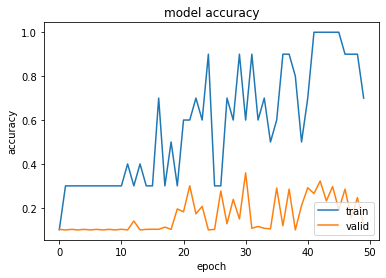

(20, 28, 28)
(59480, 28, 28)
[[20.          0.64580029  0.85000002  1.99750936  0.38875252]]


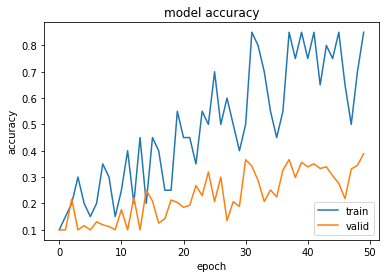

(40, 28, 28)
(59460, 28, 28)
[[40.          1.09702373  0.52499998  1.94307804  0.22825429]]


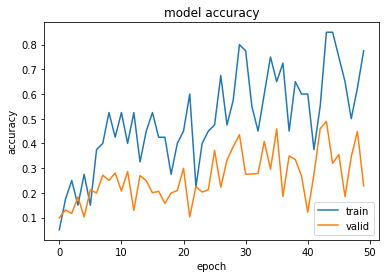

(80, 28, 28)
(59420, 28, 28)
[[80.          1.54548991  0.53750002  1.80614221  0.34567484]]


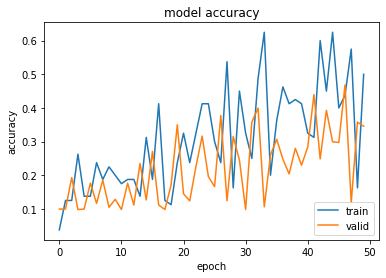

(160, 28, 28)
(59340, 28, 28)
[[160.           1.08622968   0.69999999   1.40897703   0.55505562]]


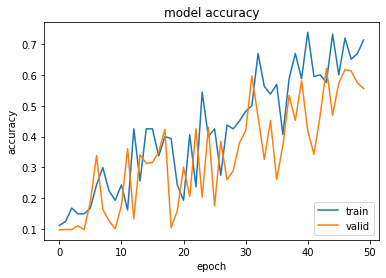

(320, 28, 28)
(59180, 28, 28)
[[320.           0.51209056   0.87812501   0.72958672   0.76633996]]


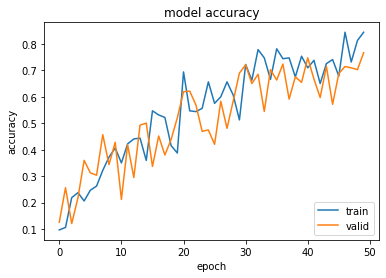

(640, 28, 28)
(58860, 28, 28)
[[6.40000000e+02 3.77093017e-01 8.81250024e-01 6.03689432e-01
  8.00407767e-01]]


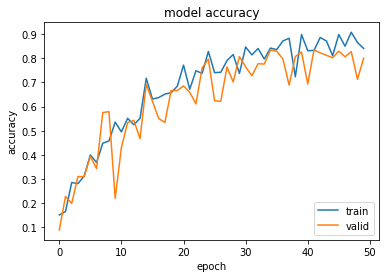

(1280, 28, 28)
(58220, 28, 28)
[[1.28000000e+03 2.20725089e-01 9.39843774e-01 4.36935037e-01
  8.62092078e-01]]


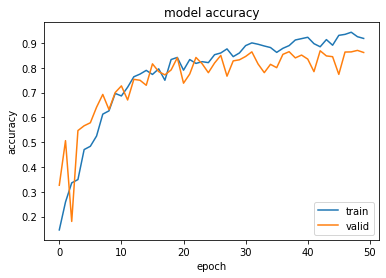

(2560, 28, 28)
(56940, 28, 28)
[[2.56000000e+03 3.87191594e-01 8.60156238e-01 5.22246122e-01
  8.29135954e-01]]


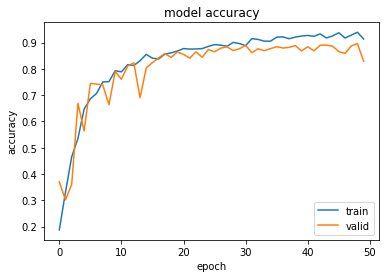

(5120, 28, 28)
(54380, 28, 28)
[[5.12000000e+03 1.33028150e-01 9.64453101e-01 2.78293759e-01
  9.15961742e-01]]


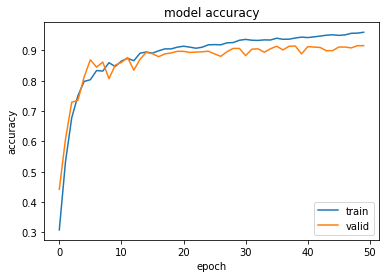

(10240, 28, 28)
(49260, 28, 28)
[[1.02400000e+04 9.74052772e-02 9.70703125e-01 2.20397726e-01
  9.35099483e-01]]


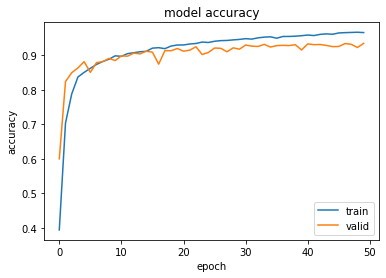

(20480, 28, 28)
(39020, 28, 28)
[[2.04800000e+04 7.70598575e-02 9.77929711e-01 1.74962536e-01
  9.46847796e-01]]


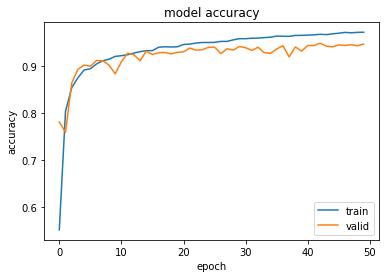

(40960, 28, 28)
(18540, 28, 28)
[[4.09600000e+04 6.00558631e-02 9.82373059e-01 1.36041641e-01
  9.60571766e-01]]


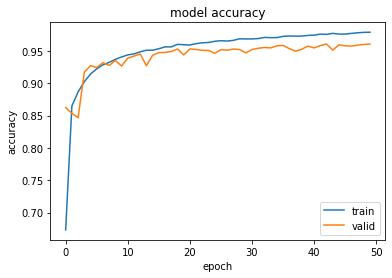

In [8]:
result = np.array([])

select_train = 10
size_train = x_train.shape[0]

while select_train < size_train:
    
    del model
    tf.keras.backend.clear_session()
    
    hidden_neurons = 50
    learning_rate = 0.3

    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hidden_neurons, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0,nesterov=False)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
        metrics=['accuracy'])
    
    name = 'mnist_one_hidden_layer_' + str(select_train)
    
    epochs = 50
    batchsize = 64
    
    x_train_sel = x_train[0:select_train,:,:]
    y_train_sel = y_train[0:select_train,:]
    x_val_sel = x_train[select_train:,:,:]
    y_val_sel = y_train[select_train:,:]

    print(x_train_sel.shape)
    print(x_val_sel.shape)

    history = model.fit(x_train_sel, y_train_sel, verbose = 0,
                        validation_data=(x_val_sel,y_val_sel), initial_epoch=0,
                        batch_size=batchsize, epochs=epochs)
    
    ret_train = model.evaluate(x_train_sel, y_train_sel, verbose = 0)
    ret_val = model.evaluate(x_val_sel, y_val_sel, verbose = 0)
    
    ret_train = np.array(ret_train).reshape(1,2)
    ret_val = np.array(ret_val).reshape(1,2)
    ret = np.concatenate((np.array(x_train_sel.shape[0]).reshape(1,1), ret_train, ret_val),1)
    
    print(ret)
    
    if result.size == 0:
        result = np.array(ret)
    else:
        result = np.concatenate((result, ret),0)
        
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='lower right')
    plt.show()
    
    select_train *= 2
        

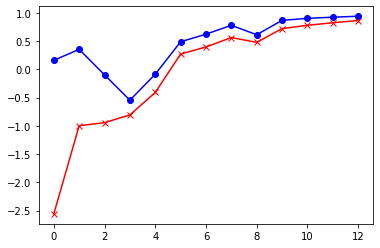

In [9]:
plt.plot(1-result[:,1],'bo-')
plt.plot(1-result[:,3],'rx-')

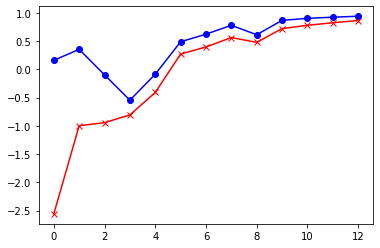

In [10]:
plt.plot(1-result[:,1],'bo-')
plt.plot(1-result[:,3],'rx-')

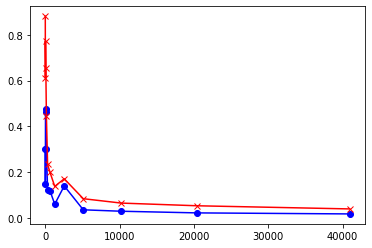

In [11]:
plt.plot(result[:,0], 1-result[:,2],'bo-')
plt.plot(result[:,0], 1-result[:,4],'rx-')

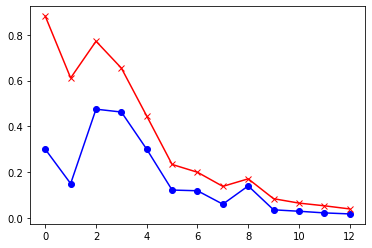

In [12]:
plt.plot(1-result[:,2],'bo-')
plt.plot(1-result[:,4],'rx-')

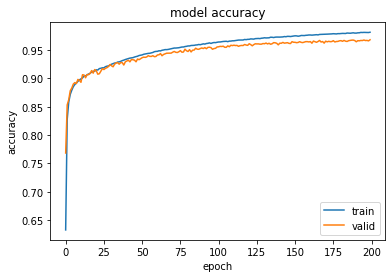

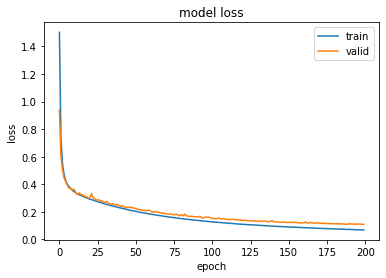

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [52]:
loss_train = np.array(history.history['loss'])
loss_test = np.array(history.history['val_loss'])

error_train = 1.0 - np.array(history.history['accuracy'])
error_test = 1.0 - np.array(history.history['val_accuracy'])

iterations = np.arange(epochs)


In [53]:
print(error_train[-1], error_test[-1])
print(error_test[20:50].min(), error_test[20:50].mean(), error_test[20:50].max(), error_test[20:50].std())


0.059600830078125 0.06789916753768921
0.06445378065109253 0.07650700211524963 0.09722691774368286 0.008208805119416145


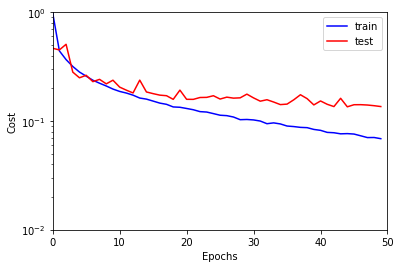

In [19]:
plt.semilogy(iterations, loss_train, "b-", label="train")
plt.semilogy(iterations, loss_test, "r-", label="test")
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.axis([0,50,0.01,1.0])
plt.legend()
plt.show()        


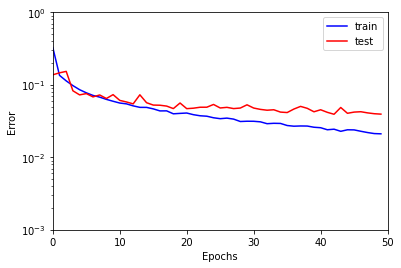

In [20]:
plt.semilogy(iterations, error_train, "b-", label="train")
plt.semilogy(iterations, error_test, "r-", label="test")
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.axis([0,50,0.001,1.0])
plt.legend()
plt.show()  

In [21]:
error_test[20:50].std()

0.0038660323788048036

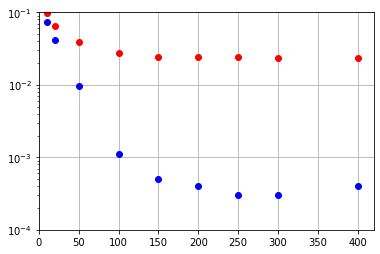

In [22]:
[10, 20, 50, 100, 150, 200, 250, 300, 400, 1000]

[9.85, 6.51, 3.87, 2.75, 2.40, 2.45, 2.39, 2.34, 2.32, 2.28]

[7.45, 4.15, 0.97, 0.11,0.05,0.04,0.03,0.03,0.04,0.05]

nneurons = np.array([10, 20, 50, 100, 150, 200, 250, 300, 400, 1000])
errors_test = np.array([9.85, 6.51, 3.87, 2.75, 2.40, 2.45, 2.39, 2.34, 2.32, 2.28])/100
errors_train = np.array([7.45, 4.15, 0.97, 0.11,0.05,0.04,0.03,0.03,0.04,0.05])/100

plt.semilogy(nneurons, errors_test,'ro',markersize=6)
plt.semilogy(nneurons, errors_train,'bo',markersize=6)
plt.axis([0,420,0.0001,0.1])
plt.grid()
